In [16]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    return w

def calc_energy(pattern, w):
    dim = pattern.size
    energy=0
    
    enrg = np.multiply(w, np.multiply.outer(pattern, pattern.T)).sum()
    
    """for i in range(dim):
        for j in range(dim):
            energy-= w[i][j]*pattern[i]*pattern[j]
    """        
    return -enrg



def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
            
        energyLevels.append(calc_energy(pattern,w))
        
        #print("Energy: ", calc_energy(pattern,w))

        if check_True(pattern):
            print ("It took:",count,"nr of iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum found in iteration:",count)
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
        
        previousPattern=pattern
        if count ==50:
            break
    
    plt.plot(range(len(energyLevels)),energyLevels)
    plt.show()
    #print(energyLevels)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            print("True! It matched pattern nr:",i)
            solved = True
    return solved
        
#print(data[0:3,:])


                     

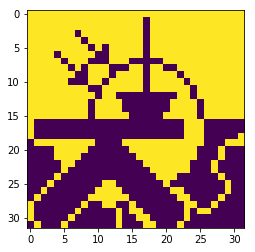

In [17]:
plt.imshow(data[10].reshape(32,32),interpolation="nearest")
plt.show()

Local minimum found in iteration: 3


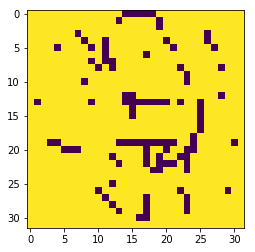

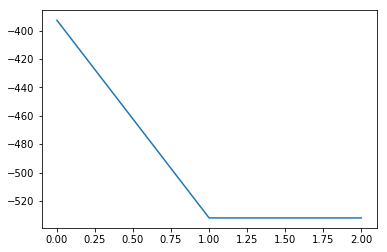

In [18]:
w = init_weights(data[0:3,:])
patterns = data[0:3,:]
recall(data[10],w)
#recall(data[10])
#recall(data[2])

In [26]:
def random_recall(pattern,w):
    dim = pattern.size
    count = 0
    previousPattern = np.zeros(dim)
    out = np.ones(dim)
    
    while True: 
        i = np.random.randint(0,dim)
        
        p = np.dot(w[i],pattern.T)
        print("Här e P:",p)
        
        for j in range(dim):
            s = 0 
            s += w[i][j]*pattern[j]
            count += 1

            
        print("Här e S:",s)
        if s >= 0:
            sign=1
        else:
            sign=-1
        
        
                    
        out[i]=sign
            
        if (count%1000) == 0:
            print("Energy: ",calc_energy(out))
            #plt.imshow(out.reshape(32,32),interpolation="nearest")
            #plt.show()
        
        
        pattern[i] = out[i]
        #print(pattern)
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        if check_True(pattern):
            print ("It took:",count,"nr of calculations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
        
        previousPattern=pattern
        

Här e P: -0.631510416667
Här e S: -0.0009765625
True! It matched pattern nr: 0
It took: 1024 nr of calculations


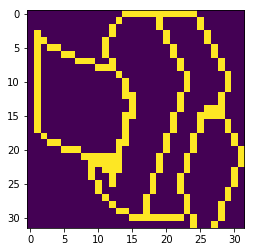

In [27]:
patterns = data[0:3,:] #Decide on what patterns you want to match against    
random_recall(data[0],w)

In [98]:
#print(calc_energy(data[0]))
#print(calc_energy(data[1]))
#print(calc_energy(data[2]))
#print(calc_energy(data[9]))
#print(calc_energy(data[10]))

-479.796875
-455.213541667
-487.416666667
-138.66015625
-57.8333333333


(1024, 1024)


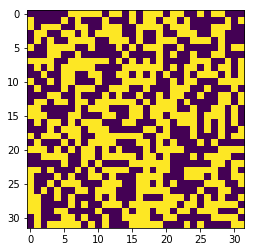

In [73]:
def genRandWeights(patterns):
    dim1 = patterns.shape[1] #Just to get the size of the weight vector
    
    w = np.random.randn(dim1,dim1)
    print(w.shape)
    return w


def genStartingState(w):
    dim=1024
    out = np.ones(dim)
    for i in range(dim):
        s = 0
        for j in range(dim):
            s += w[i][j]*out[j]

        if s >= 0:
            sign=1
        else:
            sign=-1

        out[i]=sign
    
    plt.imshow(out.reshape(32,32),interpolation="nearest")
    plt.show()
    
    
w = genRandWeights(patterns[0:3,:])
genStartingState(w)
#recall(data[0],w)

(1024, 1024)


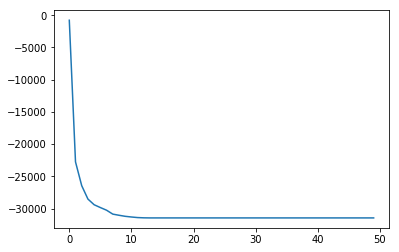

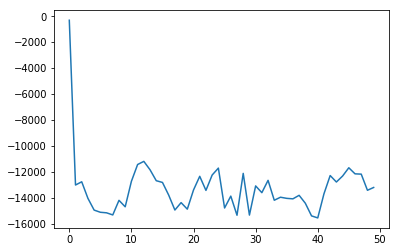

In [119]:
randW = genRandWeights(patterns[0:3,:])
symW = np.multiply(0.5,np.add(randW,randW.T))
#np.fill_diagonal(symW,0)

recall(data[0],symW)
recall(data[0],randW)
#random_recall(data[0], symW)